###  Exploratory Data Analysis (EDA)
- [2.1 Overview](#2_1) 
- [2.2 Summary and Prepping](#2_2) 
- [2.3 Listing Analysis ](#2_3) 
  - [2.3.1 Amenities vs Price](#2.3.1)
  - [2.3.2 Rooms and Accommodations vs Price](#2.3.2)
  - [2.3.3 Neighborhood vs Price](#2.3.3)
- [2.4 Census Analysis ](#2_4)
  - [2.4.1 Income, Rent, and Demographics vs Price](#2.4.1)
  - [2.4.2] Commute and education
  - [2.4.3]

### 2.1 Overview

- In our EDA, we compare and identify patterns and trends based on the listing (df_listing_with_zip_codes.csv) and the demographic's (NY_census_demographics.csv) attributes
- By analyzing and evaluating the visualizations and predictive models, we aim to better understand and summarize AirBnB's customer behavior
- Our end goal is to suggest potential actions for stakeholders based on our findings, e.g., how Airbnb prices align with rental markets, areas that might be over- or under-utilized for Airbnb hosting, and recommend prices and strategies to maximize profit

Specifically, we will consider:
- Listing Analysis
  - Amenities vs Price: do specific amenities in a listing increase its price?
  - Rooms and Accommodations vs Price: how does the number of rooms and accommodations affect price?
  - Neighborhood vs Price: does neighborhood affect listing prices? which are more expensive than others?
- Census Analysis
  - Income, Rent, and Demographics vs Price: what are the trends between these attributes? 

### 2.2 Summary and Prepping

In our data cleaning section, we preprocessed the listing and census data, let's take another look at what we have:

In [1]:
#import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_listing = pd.read_csv('df_listing_with_zip_codes.csv')
df_listing.head()

,neighbourhood_cleansed,price,latitude,longitude,room_type,property_type,accommodates,bedrooms,beds,bathrooms,bathrooms_text,amenities,host_is_superhost,neighbourhood_group_cleansed,calculated_host_listings_count,zip_code
0,Fort Hamilton,$89.00,40.614310,-74.034440,Private room,Private room in rental unit,1,1.0,1.0,1.0,1 shared bath,"[""Kitchen"", ""Dedicated workspace"", ""TV"", ""Smok...",f,Brooklyn,1,11209
1,Sunset Park,$45.00,40.639520,-74.014840,Private room,Private room in rental unit,1,1.0,1.0,1.0,1 shared bath,"[""Single level home"", ""Cleaning products"", ""St...",t,Brooklyn,2,11220
2,Morris Heights,$107.00,40.850030,-73.922810,Private room,Private room in rental unit,2,1.0,1.0,1.0,1 shared bath,"[""Kitchen"", ""Hair dryer"", ""Hot water"", ""Dryer""...",f,Bronx,3,10040
3,East Harlem,$140.00,40.798718,-73.940093,Entire home/apt,Entire rental unit,8,3.0,3.0,2.0,2 baths,"[""Building staff"", ""Elevator"", ""Dedicated work...",f,Manhattan,5,10035
4,South Slope,$340.00,40.668012,-73.985226,Entire home/apt,Entire home,5,4.0,4.0,2.5,2.5 baths,"[""BBQ grill"", ""Kitchen"", ""Dedicated workspace""...",f,Brooklyn,3,11215


In [2]:
#bathrooms and bathrooms texts are rather redundant, so we drop bathrooms text
df_listing = df_listing.drop(columns=['bathrooms_text'])
df_listing.head()

,neighbourhood_cleansed,price,latitude,longitude,room_type,property_type,accommodates,bedrooms,beds,bathrooms,amenities,host_is_superhost,neighbourhood_group_cleansed,calculated_host_listings_count,zip_code
0,Fort Hamilton,$89.00,40.614310,-74.034440,Private room,Private room in rental unit,1,1.0,1.0,1.0,"[""Kitchen"", ""Dedicated workspace"", ""TV"", ""Smok...",f,Brooklyn,1,11209
1,Sunset Park,$45.00,40.639520,-74.014840,Private room,Private room in rental unit,1,1.0,1.0,1.0,"[""Single level home"", ""Cleaning products"", ""St...",t,Brooklyn,2,11220
2,Morris Heights,$107.00,40.850030,-73.922810,Private room,Private room in rental unit,2,1.0,1.0,1.0,"[""Kitchen"", ""Hair dryer"", ""Hot water"", ""Dryer""...",f,Bronx,3,10040
3,East Harlem,$140.00,40.798718,-73.940093,Entire home/apt,Entire rental unit,8,3.0,3.0,2.0,"[""Building staff"", ""Elevator"", ""Dedicated work...",f,Manhattan,5,10035
4,South Slope,$340.00,40.668012,-73.985226,Entire home/apt,Entire home,5,4.0,4.0,2.5,"[""BBQ grill"", ""Kitchen"", ""Dedicated workspace""...",f,Brooklyn,3,11215


In [3]:
#we will be looking at price a lot, so we need to convert price to float, removing the $ symbol
df_listing['price'] = df_listing['price'].replace('[\$,]', '', regex=True).astype(float)
df_listing.head()

,neighbourhood_cleansed,price,latitude,longitude,room_type,property_type,accommodates,bedrooms,beds,bathrooms,amenities,host_is_superhost,neighbourhood_group_cleansed,calculated_host_listings_count,zip_code
0,Fort Hamilton,89.0,40.614310,-74.034440,Private room,Private room in rental unit,1,1.0,1.0,1.0,"[""Kitchen"", ""Dedicated workspace"", ""TV"", ""Smok...",f,Brooklyn,1,11209
1,Sunset Park,45.0,40.639520,-74.014840,Private room,Private room in rental unit,1,1.0,1.0,1.0,"[""Single level home"", ""Cleaning products"", ""St...",t,Brooklyn,2,11220
2,Morris Heights,107.0,40.850030,-73.922810,Private room,Private room in rental unit,2,1.0,1.0,1.0,"[""Kitchen"", ""Hair dryer"", ""Hot water"", ""Dryer""...",f,Bronx,3,10040
3,East Harlem,140.0,40.798718,-73.940093,Entire home/apt,Entire rental unit,8,3.0,3.0,2.0,"[""Building staff"", ""Elevator"", ""Dedicated work...",f,Manhattan,5,10035
4,South Slope,340.0,40.668012,-73.985226,Entire home/apt,Entire home,5,4.0,4.0,2.5,"[""BBQ grill"", ""Kitchen"", ""Dedicated workspace""...",f,Brooklyn,3,11215


In [4]:
#bedrooms, beds, and bathrooms are all missing less than 1% of data (as shown in section 1.3 of data cleaning) so we replace the na with the median
df_listing['bedrooms'] = df_listing['bedrooms'].fillna(df_listing['bedrooms'].median())
df_listing['beds'] = df_listing['beds'].fillna(df_listing['beds'].median())
df_listing['bathrooms'] = df_listing['bathrooms'].fillna(df_listing['bathrooms'].median())

#we will also replace missing values for superhost (1.5% of data) with the mode
df_listing['host_is_superhost'] = df_listing['host_is_superhost'].fillna(df_listing['host_is_superhost'].mode()[0])

#check to make sure there's no more missing data
(df_listing.isna().sum()/df_listing.shape[0])  * 100

neighbourhood_cleansed            0.0
price                             0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
property_type                     0.0
accommodates                      0.0
bedrooms                          0.0
beds                              0.0
bathrooms                         0.0
amenities                         0.0
host_is_superhost                 0.0
neighbourhood_group_cleansed      0.0
calculated_host_listings_count    0.0
zip_code                          0.0
dtype: float64

In [5]:
census_data = pd.read_csv('NY_census_demographics.csv')
census_data.head()

,total_population,median_income,median_rent,median_home_value,vacant_units,total_units,avg_commute_time,median_age,non_hispanic_white,hispanic_population,per_capita_income,poverty_count,median_year_built,rent_burden_30_50,total_housing_units,bachelors_degree,workers_public_transit,vehicles_available,zip_code
0,71812.0,88546.0,1801.0,935000.0,3168.0,33347.0,28537.0,40.6,14178.0,43362.0,52048.0,7636.0,33347.0,1605.0,33347.0,7960.0,28537.0,30179.0,11209
1,93008.0,62804.0,1641.0,978800.0,2658.0,30565.0,36683.0,36.0,38012.0,13974.0,25708.0,20513.0,30565.0,1677.0,30565.0,14065.0,36683.0,27907.0,11220
2,43653.0,59115.0,1623.0,454000.0,889.0,17430.0,17098.0,40.3,31339.0,8924.0,35363.0,7806.0,17430.0,824.0,17430.0,5462.0,17098.0,16541.0,10040
3,38595.0,36989.0,1116.0,661800.0,1406.0,16239.0,12539.0,37.1,16604.0,5033.0,30083.0,13268.0,16239.0,1612.0,16239.0,5340.0,12539.0,14833.0,10035
4,72014.0,173899.0,2673.0,1597400.0,2502.0,31967.0,29437.0,37.2,10855.0,48203.0,98246.0,4189.0,31967.0,1382.0,31967.0,2872.0,29437.0,29465.0,11215


In [6]:
#now we merge the two data sets into one on zipcode
df = df_listing.merge(census_data, on='zip_code', how='left')
df.head()

,neighbourhood_cleansed,price,latitude,longitude,room_type,property_type,accommodates,bedrooms,beds,bathrooms,...,non_hispanic_white,hispanic_population,per_capita_income,poverty_count,median_year_built,rent_burden_30_50,total_housing_units,bachelors_degree,workers_public_transit,vehicles_available
0,Fort Hamilton,89.0,40.614310,-74.034440,Private room,Private room in rental unit,1,1.0,1.0,1.0,...,14178.0,43362.0,52048.0,7636.0,33347.0,1605.0,33347.0,7960.0,28537.0,30179.0
1,Sunset Park,45.0,40.639520,-74.014840,Private room,Private room in rental unit,1,1.0,1.0,1.0,...,38012.0,13974.0,25708.0,20513.0,30565.0,1677.0,30565.0,14065.0,36683.0,27907.0
2,Morris Heights,107.0,40.850030,-73.922810,Private room,Private room in rental unit,2,1.0,1.0,1.0,...,31339.0,8924.0,35363.0,7806.0,17430.0,824.0,17430.0,5462.0,17098.0,16541.0
3,East Harlem,140.0,40.798718,-73.940093,Entire home/apt,Entire rental unit,8,3.0,3.0,2.0,...,16604.0,5033.0,30083.0,13268.0,16239.0,1612.0,16239.0,5340.0,12539.0,14833.0
4,South Slope,340.0,40.668012,-73.985226,Entire home/apt,Entire home,5,4.0,4.0,2.5,...,10855.0,48203.0,98246.0,4189.0,31967.0,1382.0,31967.0,2872.0,29437.0,29465.0


In [7]:
#see if there are any unmatched zipcodes
(df.isna().sum()/df.shape[0])  * 100

neighbourhood_cleansed            0.000000
price                             0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
property_type                     0.000000
accommodates                      0.000000
bedrooms                          0.000000
beds                              0.000000
bathrooms                         0.000000
amenities                         0.000000
host_is_superhost                 0.000000
neighbourhood_group_cleansed      0.000000
calculated_host_listings_count    0.000000
zip_code                          0.000000
total_population                  0.618692
median_income                     0.618692
median_rent                       0.618692
median_home_value                 0.618692
vacant_units                      0.618692
total_units                       0.618692
avg_commute_time                  0.618692
median_age                        0.618692
non_hispani

In [8]:
# since the unmatched zipcodes make up less than 1% of the data, we will remove them for efficiency
df_listing = df_listing[df_listing['zip_code'].isin(census_data['zip_code'])]
df = df_listing.merge(census_data, on='zip_code', how='left')
df.shape

(22649, 33)

In [9]:
# we also saw that there are some zipcodes with very few listings in 1.4.1, let's take a look again and conclude what we should do with them
df['zip_code'].value_counts(ascending=True).head(20)

zip_code
10152    1
11359    1
10162    1
10110    1
11430    1
11371    1
7093     1
11003    1
11580    1
10169    1
10153    2
10168    2
10279    2
11363    3
10308    4
10115    4
10307    4
11364    4
11239    4
10309    5
Name: count, dtype: int64

In [10]:
#since zipcodes with too few listings might not be the most reliable when analyzing trends, we remove those with less than 5 listings 
#this will ensure less bias/noise while also being more inclusive and not losing too much (as opposed to a threshold of 10 or more)
threshold = 5
valid_zip_codes = df['zip_code'].value_counts()[df['zip_code'].value_counts() >= threshold].index
df = df[df['zip_code'].isin(valid_zip_codes)]
df.shape

(22610, 33)

### Summary Statistics Overview
- Let's get a brief overview of our price data and all of our attributes

In [11]:
df.describe()

,price,latitude,longitude,accommodates,bedrooms,beds,bathrooms,calculated_host_listings_count,zip_code,total_population,...,non_hispanic_white,hispanic_population,per_capita_income,poverty_count,median_year_built,rent_burden_30_50,total_housing_units,bachelors_degree,workers_public_transit,vehicles_available
count,22610.000000,22610.000000,22610.000000,22610.000000,22610.000000,22610.000000,22610.000000,22610.000000,22610.000000,22610.000000,...,22610.000000,22610.000000,2.261000e+04,22610.000000,22610.000000,22610.000000,22610.000000,22610.000000,22610.000000,22610.000000
mean,232.392437,40.727419,-73.943591,2.836223,1.348120,1.626316,1.186975,76.225874,10676.927908,57110.411499,...,14249.735559,19410.155993,-1.257782e+06,9834.596418,26646.235825,1557.017293,26646.235825,7062.938302,23900.090845,23678.109907
std,1023.583480,0.058379,0.059555,2.012330,0.971416,1.199683,0.551169,200.094463,606.844828,25455.682443,...,12625.094559,13350.633308,2.971579e+07,7369.538483,10007.550672,825.374044,10007.550672,5917.616670,10290.269777,9225.087945
min,8.000000,40.517070,-74.215140,1.000000,0.000000,0.000000,0.000000,1.000000,10001.000000,0.000000,...,0.000000,0.000000,-6.666667e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,84.000000,40.685654,-73.983142,2.000000,1.000000,1.000000,1.000000,1.000000,10023.000000,38265.000000,...,6330.000000,9623.000000,3.585700e+04,4097.000000,18508.000000,986.000000,18508.000000,2163.000000,16085.000000,16361.000000
50%,146.000000,40.726327,-73.952681,2.000000,1.000000,1.000000,1.000000,3.000000,11102.000000,56695.000000,...,8459.000000,17453.000000,4.644200e+04,7636.000000,28596.000000,1437.000000,28596.000000,5340.000000,24178.000000,24987.000000
75%,250.000000,40.762870,-73.921847,4.000000,2.000000,2.000000,1.000000,17.000000,11222.000000,76518.000000,...,19864.000000,27937.000000,1.003250e+05,14221.000000,34581.000000,1983.000000,34581.000000,10922.000000,29216.000000,31366.000000
max,100000.000000,40.911390,-73.713650,16.000000,16.000000,42.000000,15.500000,876.000000,11694.000000,112750.000000,...,85529.000000,56909.000000,1.917090e+05,31579.000000,47715.000000,3655.000000,47715.000000,30944.000000,52779.000000,41653.000000


In [12]:
# import matplotlib.pyplot as plt

# # Price distribution
# plt.hist(tmp_df['price'], bins=50, alpha=0.7)
# plt.title('Distribution of Airbnb Prices')
# plt.xlabel('Price')
# plt.ylabel('Frequency')
# plt.show()

Most of our prices points are below 100 a night, but there seems to a quite a few with more than that. Let's keep that in mind

Now we're ready to analyze our data!

### 2.3 Listing Analysis

### 2.3.1. Amenities vs Price
Here, we want to see whether specific amenities in a listing will increase its price. 
As a result, we can explore trends in consumer preferences and behavior and offer recommendations for:
- Hosts: which amenities to prioritize to maximize their revenue
- Travelers: identify which amenities contribute to most cost and decide whether they are worth it

In [13]:
#split amenities data into list
import re
def amenities(amenities_string):
    return re.split('[","]+', amenities_string)[1:-1:2]

df['amenities'] = df['amenities'].apply(amenities)

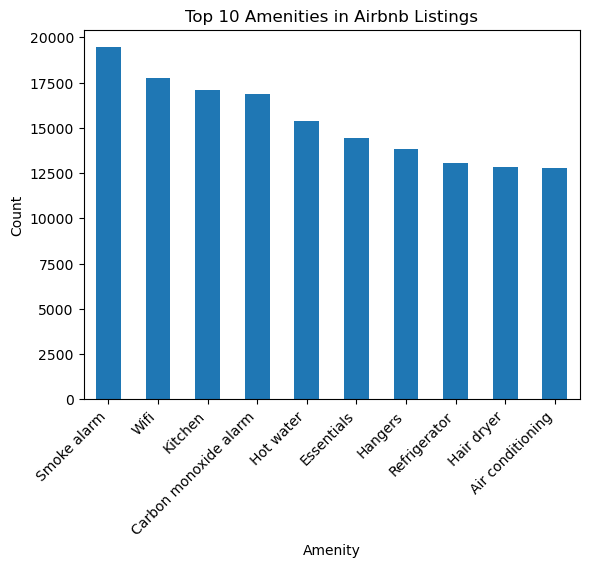

In [14]:
#now, we decide to remove some outliers using IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

#EDA, check how many listings have a particular amenity and identify which amenities are most common
all_amenities = [amenity for sublist in df['amenities'] for amenity in sublist]
all_amenities = [amenity for amenity in all_amenities if amenity != ' ']
amenity_counts = pd.Series(all_amenities).value_counts()

#visualize the frequency of amenities
amenity_counts.head(10).plot(kind='bar')
plt.title('Top 10 Amenities in Airbnb Listings')
plt.xlabel('Amenity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

The graph above makes sense, all the amenities in the top 10 are necessary for everyday living. Next, we want to see if there are any specific amenities that drastically increase prices. We hypothesize that there is some sort of trend and that these amenities are likely not necessary, but nice to have.

In [15]:
#get more common amenities (so less time is used when executing code)
threshold = 10
common_amenities = amenity_counts[amenity_counts >= threshold]
common_amenities

Smoke alarm                                          19451
Wifi                                                 17767
Kitchen                                              17111
Carbon monoxide alarm                                16900
Hot water                                            15381
                                                     ...  
65 inch HDTV with Fire TV                               10
Kenmore gas stove                                       10
60 inch HDTV with Netflix                               10
Free driveway parking on premises \u2013 2 spaces       10
65 inch HDTV with HBO Max                               10
Name: count, Length: 464, dtype: int64

In [16]:
#now we create binary for amenities to see which amenities increase price
amenities_price = df[['amenities','price']].copy()
binary_columns = {amenity: amenities_price['amenities'].apply(lambda x: int(amenity in x)) for amenity in common_amenities.index}

#merge dataframes
binary_columns_df = pd.DataFrame(binary_columns)
amenities_price = pd.concat([amenities_price, binary_columns_df], axis=1)
amenities_price = amenities_price.drop(columns=['amenities'])
amenities_price.head()

,price,Smoke alarm,Wifi,Kitchen,Carbon monoxide alarm,Hot water,Essentials,Hangers,Refrigerator,Hair dryer,...,75 inch HDTV with Amazon Prime Video,Liebherr refrigerator,55 inch HDTV with Apple TV,Private hot tub - available all year,GE oven,65 inch HDTV with Fire TV,Kenmore gas stove,60 inch HDTV with Netflix,Free driveway parking on premises \u2013 2 spaces,65 inch HDTV with HBO Max
0,89.0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,45.0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,107.0,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,140.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,340.0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Crib                          0.366815
Gym                           0.342465
High chair                    0.315156
Elevator                      0.300639
Dishwasher                    0.294852
Pets allowed                  0.272646
Hair dryer                    0.266584
Shampoo                       0.248790
Dryer \u2013\u00a0In unit     0.246299
Washer \u2013\u00a0In unit    0.245990
Name: price, dtype: float64


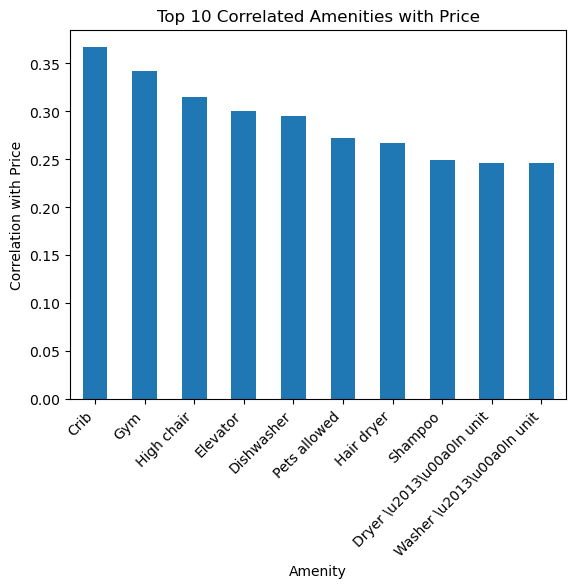

In [17]:
#correlation between amenities and price
amenities_corr = amenities_price.corr()['price'].drop('price')
print(amenities_corr.sort_values(ascending=False).head(10))

#visualize the top 10 correlated amenities
amenities_corr.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Correlated Amenities with Price')
plt.xlabel('Amenity')
plt.ylabel('Correlation with Price')
plt.xticks(rotation=45, ha='right')
plt.show()

- The amenities here make sense to us. Just as we hypothesized, these amenities are not as necessary, but definitely nice to have depending on the customer's values and circumstances.
- The correlation coefficient for the top ten ranges from 0.25 to 0.35, which is not considered very strong.
- However, we can say that there is a moderately positive correlation between price and having a crib, gym, high chair, elevator, or dishwasher.
    - As a result, we can suggest that these amenities might be good to have if hosts want to increase their revenues, of course while keeping cost in account as well
    - Customers can consider whether these amenities are worth to them or not.
- Meanwhile, there is a weaker correlation between price and having pets allowed, a hairdryer, shampoo, in-unit washer, or in-unit dryer.
     - These amenities show to increase price with less confidence, but could still be something to consider for both hosts and customers
- We do a regression next to better understand the relationship between a price and multiple amenities.

In [18]:
pip install scikit-learn

  Using cached scikit_learn-1.6.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


R-squared: 0.43051997493344585
Mean Squared Error: 6537.34972190108


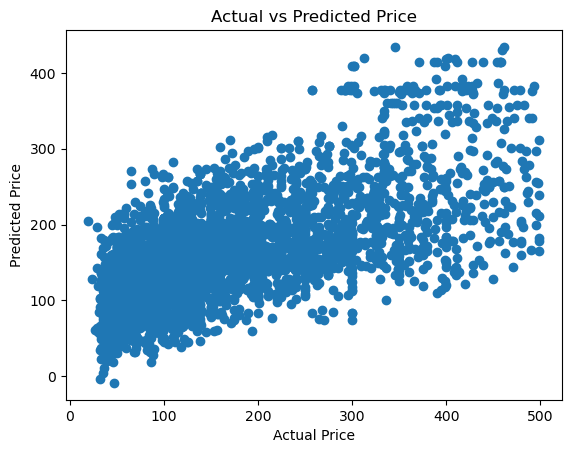

In [19]:
#regression using ridge to address multicollinearity
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


x = amenities_price.drop(columns=['price'])
y = amenities_price['price']

#standardize
scaler = StandardScaler()
x = scaler.fit_transform(x)

#train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = Lasso()
model.fit(x_train, y_train)

# evaluate model
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

# visualize the predicted vs actual price
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

- The R2 is 0.43, suggesting the model explains 40% of variance and is capturing moderately meaningful relationships between amenities and price
- The MSE of 6537 suggest our predictions are not the most accurate here, likely because there are lots of other factors that affect price.
- Thus, we conclude that there are meaningful relationships between amenities and price, but in general, it's worth experimenting with other approaches to improve prediction accuracy, which we will do later on.

### 2.3.2 Rooms and Accommodations vs Price
In this section, we see how the number of rooms, bathrooms, beds, and number of people accommodated affect price gain insights on pricing dynamics in relation to property size and capacity.
- what are some general trends when it comes to rooms and accommodations
- what is the median price based on what rooms are desirable
- what do correlations look like for luxury and budget airbnbs

In [20]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


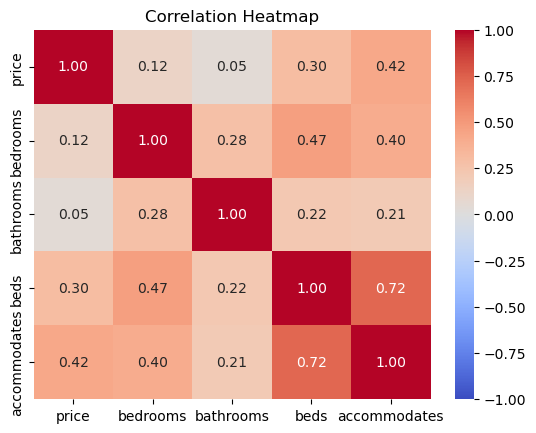

In [21]:
import seaborn as sns
# compute correlation matrix
correlation_matrix = df[['price', 'bedrooms', 'bathrooms', 'beds', 'accommodates']].corr()

# create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Correlations to note:
- accommodates and price have a moderately positive correlation (.42)
- beds and price have a moderately positive correlation, but not as strong as accommodates (.30)
- this means that generally, as the the number of people accommodated and/or the number of beds increases, then price will increase
- this also means that bathrooms and bedrooms aren't typically associated with a higher price on the listing

Sometimes, guests care about specific number of beds based on people accommodated. We can take a look at median price based on these two variables.

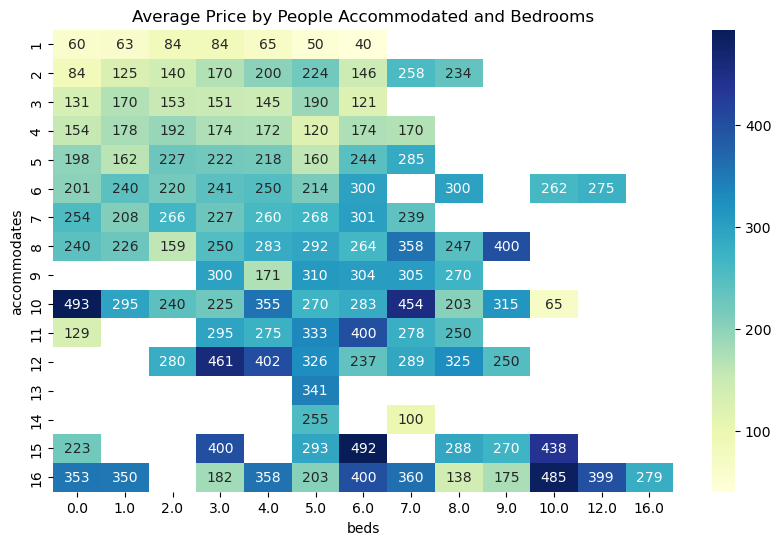

In [22]:
# pivot table average price
pivot_table = df.pivot_table(values='price', index='accommodates', columns='beds', aggfunc='median')

# create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".0f")
plt.title('Average Price by People Accommodated and Bedrooms')
plt.xlabel('beds')
plt.ylabel('accommodates')
plt.show()

Unsurprisingly, more people and more beds generally have a more expensive listing, but not necessarily. As noted above, the correlation between these two features and price is only moderately positive, so some listings are worth investigating if guests want to save money. Additionally, if a host wants to increase the price, this doesn't necessarily mean they should add another bed since sometimes, the price decreases with more beds, probably because people would be more cramped.

R-squared: 0.5117832388031758
Mean Squared Error: 5604.487545747548
Coefficient of accommodate: 30.42220516976378
Intercept: 162.57830571342123
52.61725315698376


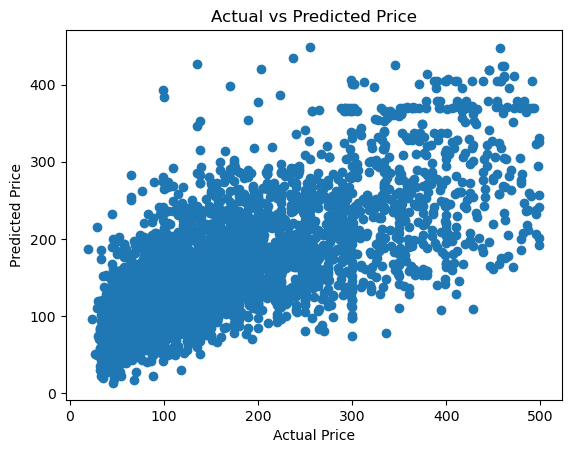

In [23]:
from sklearn.linear_model import LinearRegression, Lasso

#perform multiple linear regression using ridge to address the multicollinearity seen in the heat map
#adding rooms and beds to amenities to get more factors
amenities_rooms_price = pd.concat([amenities_price, df[['bedrooms', 'bathrooms', 'beds', 'accommodates']]], axis=1)
x = amenities_rooms_price.drop(columns=['price'])
y = amenities_rooms_price['price']

original_std = x['accommodates'].std()

#standardize
scaler = StandardScaler()
x = scaler.fit_transform(x)

#train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = Lasso()
model.fit(x_train, y_train)

# evaluate model
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print("Coefficient of accommodate:", model.coef_[-1]) #want to see accommodate since it's most correlated with price
print("Intercept:", model.intercept_)

#get price increase
accommodates_coeff = model.coef_[-1]
interpretable_coeff = accommodates_coeff * original_std
print(interpretable_coeff)

# visualize the predicted vs actual price
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

- Based on these results, one extra person accommodated will increase the listing price by about $53 on average
- Additionally, this model now accounts for 51% of the variance, which is better than just counting amenities. However, the R squared is still rather large, which means there are still more factors we should consider.
- Let's take a look at how price per person varies for different listings

In [24]:
df['price_per_person'] = df['price'] / df['accommodates']
df.head()

,neighbourhood_cleansed,price,latitude,longitude,room_type,property_type,accommodates,bedrooms,beds,bathrooms,...,hispanic_population,per_capita_income,poverty_count,median_year_built,rent_burden_30_50,total_housing_units,bachelors_degree,workers_public_transit,vehicles_available,price_per_person
0,Fort Hamilton,89.0,40.614310,-74.034440,Private room,Private room in rental unit,1,1.0,1.0,1.0,...,43362.0,52048.0,7636.0,33347.0,1605.0,33347.0,7960.0,28537.0,30179.0,89.0
1,Sunset Park,45.0,40.639520,-74.014840,Private room,Private room in rental unit,1,1.0,1.0,1.0,...,13974.0,25708.0,20513.0,30565.0,1677.0,30565.0,14065.0,36683.0,27907.0,45.0
2,Morris Heights,107.0,40.850030,-73.922810,Private room,Private room in rental unit,2,1.0,1.0,1.0,...,8924.0,35363.0,7806.0,17430.0,824.0,17430.0,5462.0,17098.0,16541.0,53.5
3,East Harlem,140.0,40.798718,-73.940093,Entire home/apt,Entire rental unit,8,3.0,3.0,2.0,...,5033.0,30083.0,13268.0,16239.0,1612.0,16239.0,5340.0,12539.0,14833.0,17.5
4,South Slope,340.0,40.668012,-73.985226,Entire home/apt,Entire home,5,4.0,4.0,2.5,...,48203.0,98246.0,4189.0,31967.0,1382.0,31967.0,2872.0,29437.0,29465.0,68.0


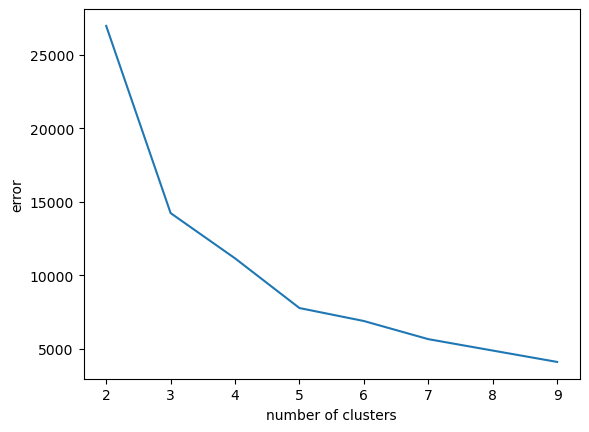

In [60]:
#we now perform clustering to see if we can categorize these listings into different groups
#elbow method
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = df[['price_per_person', 'accommodates']]
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

errors=[]
for n in range(2,10): 
    kmeans=KMeans(n) 
    kmeans.fit(scaled) 
    errors.append(kmeans.inertia_)

plt.plot(range(2,10),errors) 
plt.xlabel('number of clusters'); 
plt.ylabel('error');

In [74]:
#clustering
kmeans = KMeans(n_clusters=3)

tmp_df = df[['bedrooms', 'bathrooms', 'beds', 'accommodates', 'price_per_person', 'price']]

tmp_df['cluster'] = kmeans.fit_predict(scaled)

cluster_summary = tmp_df.groupby('cluster').agg({'beds': 'mean', 'bathrooms': 'mean', 'accommodates': 'mean', 'price_per_person': 'mean'})
print(cluster_summary)

             beds  bathrooms  accommodates  price_per_person
cluster                                                     
0        1.222188   1.049135      1.896786        157.477261
1        3.389279   1.437610      6.470562         40.840722
2        1.344103   1.124691      2.249967         55.469483


/tmp/ipykernel_412/1068863706.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['cluster'] = kmeans.fit_predict(scaled)


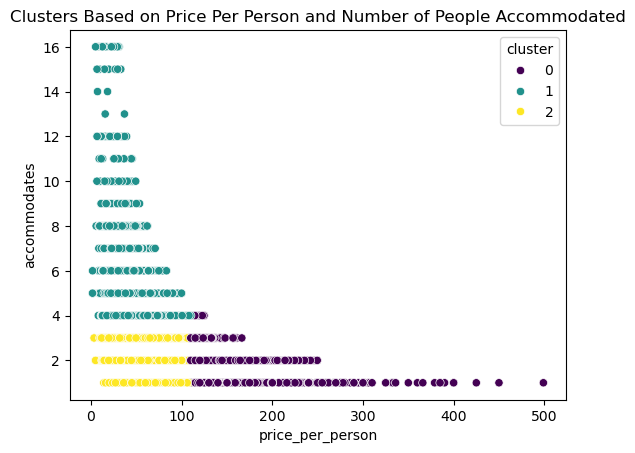

In [72]:
sns.scatterplot(data=tmp_df, x='price_per_person', y='accommodates', hue='cluster', palette='viridis')
plt.title('Clusters Based on Price Per Person and Number of People Accommodated')
plt.show()

The listings fall into 3 different groups:
- One accommodates a small group of people at a low to medium price. this is likely budget-friendly.
- One accommodates a small group at a medium to very high price. this listing is likely luxury.
- one accommodates a very large group of people for a small price. this is likely for families or large groups with a tighter budget
- now let's evaluate each individual cluster

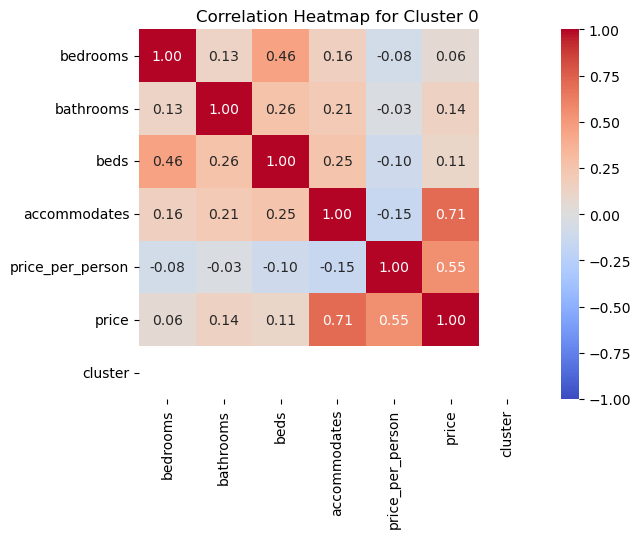

In [89]:
# filter for a specific cluster
cluster_0 = tmp_df[tmp_df['cluster'] == 0]

#correlation matrix=
cluster_0_corr = cluster_0.corr()

#heatmap
sns.heatmap(cluster_0_corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Cluster 0 (Luxury)")
plt.show()

For luxury listings, an increase in bedrooms, beds, and bathrooms doesn't significantly impact price or price per person. However, an increase in people accommodated has a strongly positive correlation with price. 
- If luxury listings increase the number of people accommodated, they could gain more profit.

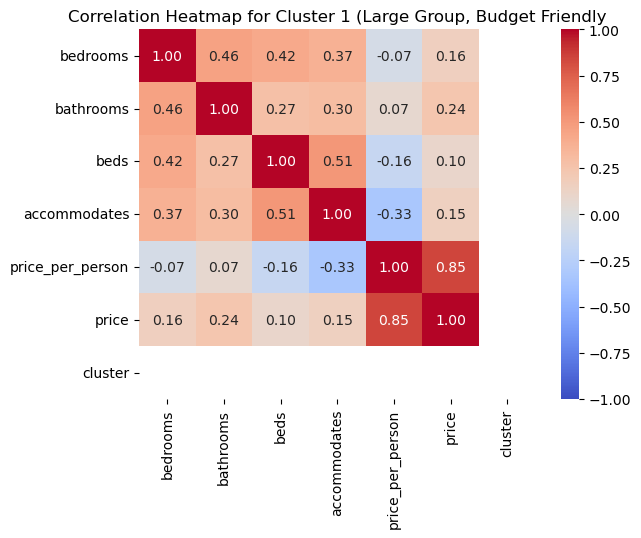

In [92]:
#filter for a specific cluster
cluster_1 = tmp_df[tmp_df['cluster'] == 1]

#correlation matrix
cluster_1_corr = cluster_1.corr()

#heatmap
sns.heatmap(cluster_1_corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Cluster 1 (Large Group, Budget Friendly")
plt.show()

For budget listings with large groups, an increase in bedrooms, beds, and bathrooms doesn't significantly impact price or price per person. Price per person has a moderately negative correlation with accommodate.
- if guests on a budget want to minimize how much they spend, they should include more people in their group

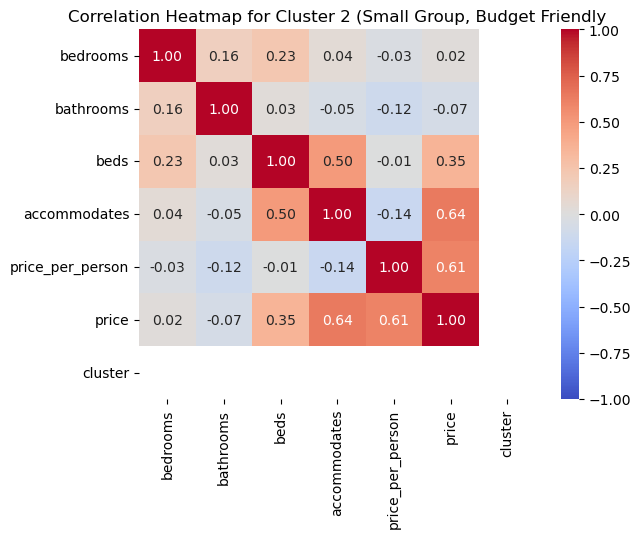

In [93]:
#filter for a specific cluster
cluster_2 = tmp_df[tmp_df['cluster'] == 2]

#correlation matrix
cluster_2_corr = cluster_2.corr()

#heatmap
sns.heatmap(cluster_2_corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Cluster 2 (Small Group, Budget Friendly")
plt.show()

For budget listings with small groups, an increase in bedrooms, beds, and bathrooms doesn't significantly impact price or price per person. Price has a moderately positive correlation with accommodate.
- If budget listings increase the number of people accommodated, they could gain more profit.

### 2.3. Neighborhood vs Price
In this section, we want to see how different neighborhoods or boroughs could affect listing prices. We are solely looking at just the neighborhoods/boroughs here and not their demographic information just yet, just so we can get a general sense of the patterns between neighborhood and listing prices.
- if hosts and customers are solely interested in price, they can consider which neighborhood/borough to get the listing from based on these results

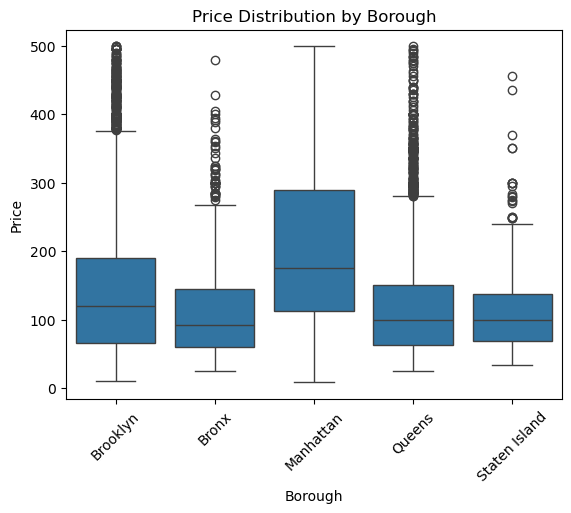

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

#boxplot for boroughs and price
sns.boxplot(x='neighbourhood_group_cleansed', y='price', data=df)
plt.title('Price Distribution by Borough')
plt.xticks(rotation=45)
plt.xlabel('Borough')
plt.ylabel('Price')
plt.show()

In [29]:
#get median price of each borough
df.groupby('neighbourhood_group_cleansed')['price'].median().reset_index()

,neighbourhood_group_cleansed,price
0,Bronx,92.5
1,Brooklyn,120.0
2,Manhattan,175.0
3,Queens,99.0
4,Staten Island,99.0


/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


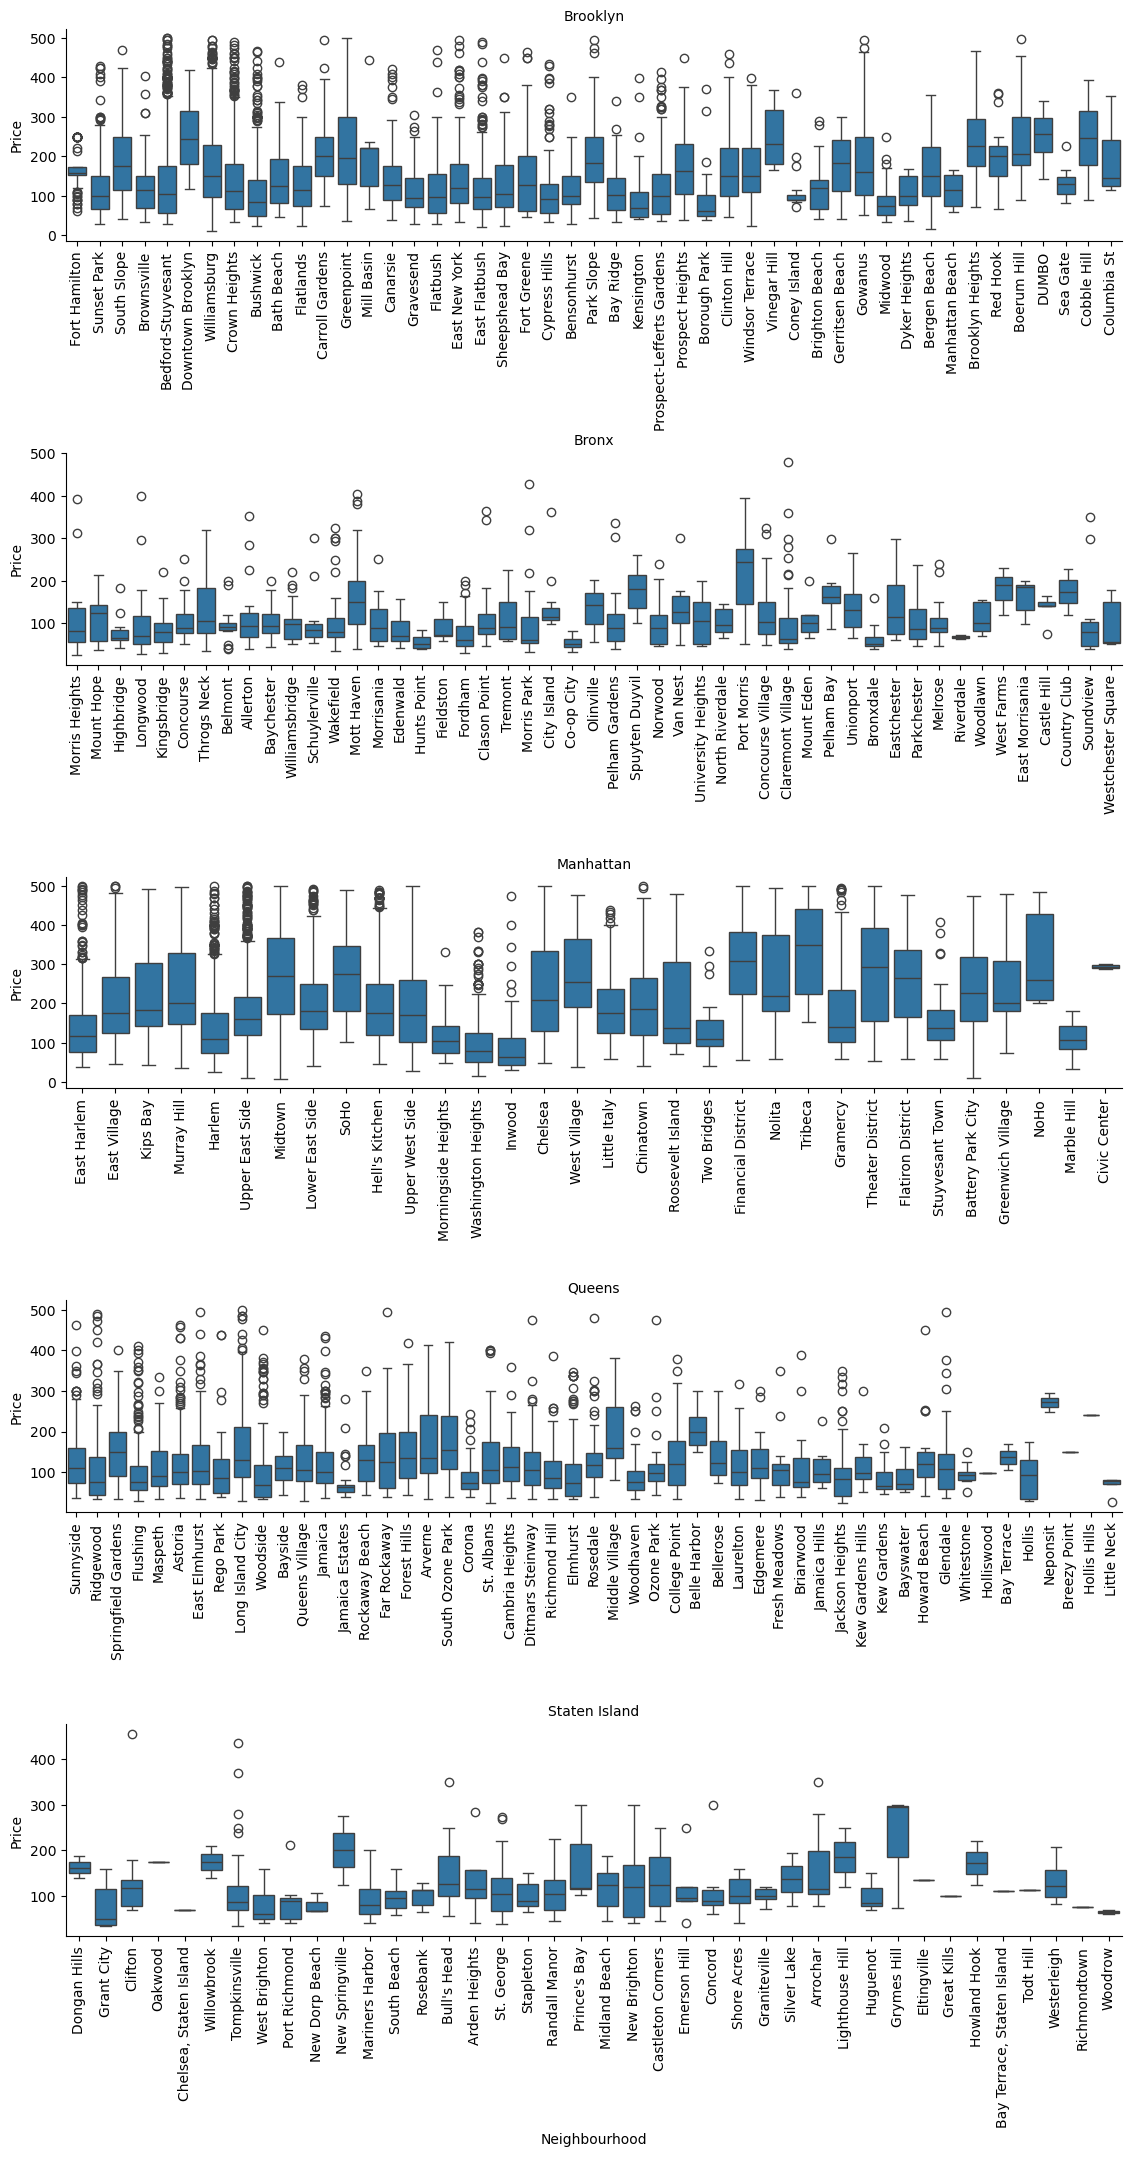

In [30]:
# facetgrid for each borough and its neighborhoods
g = sns.FacetGrid(df, col='neighbourhood_group_cleansed', col_wrap=1, height=4, aspect=3, sharex=False, sharey=False)
g.map(sns.boxplot, 'neighbourhood_cleansed', 'price')

#add labels and titles
g.set_axis_labels('Neighbourhood', 'Price')
g.set_titles("{col_name}")
g.set_xticklabels(rotation=90)
plt.subplots_adjust(hspace=1, wspace=0.3)
plt.show()

In [31]:
median_prices = df.groupby(['neighbourhood_group_cleansed','neighbourhood_cleansed'])['price'].median().reset_index()
max_prices = median_prices.loc[median_prices.groupby('neighbourhood_group_cleansed')['price'].idxmax()]
min_prices = median_prices.loc[median_prices.groupby('neighbourhood_group_cleansed')['price'].idxmin()]
print(max_prices)
print(min_prices)

    neighbourhood_group_cleansed neighbourhood_cleansed  price
34                         Bronx            Port Morris  245.0
68                      Brooklyn                  DUMBO  257.5
122                    Manhattan                Tribeca  350.0
164                       Queens               Neponsit  272.0
193                Staten Island            Grymes Hill  295.0
    neighbourhood_group_cleansed neighbourhood_cleansed  price
3                          Bronx              Bronxdale   50.0
55                      Brooklyn           Borough Park   61.0
108                    Manhattan                 Inwood   63.0
155                       Queens        Jamaica Estates   64.5
191                Staten Island             Grant City   50.0


- Based on these boxplots, we can see that generally, Manhattan has more expensive listings, with Brooklyn, Queens, and Staten Island being the next expensive, respectively, and the Bronx having the cheapest listings.
- In each borough
    - Manhattan: Most Expensive: Tribeca, Cheapest: Inwood is cheapest
    - Brooklyn: Most Expensive: DUMBO, Cheapest: Borough Park
    - Queens: Most Expensive: Deponsit, Cheapest: Jamaica Estates
    - Staten Island: Most Expensive: Grymes Hill, Cheapest: Grant City
    - Bronx: Most Expensive: Port Morris, Cheapest: Bronnxdale
- In the next section, we will look at the census data to evaluate why certain neighborhoods might be cheaper than others

### 2.4 Census Analysis
- We will breaking it down to two segments:
  - Demographics, Population, Income, and Rent
  - Commute & Travel, and Education

- Let's first conduct a heat map analysis of price and every census attribute

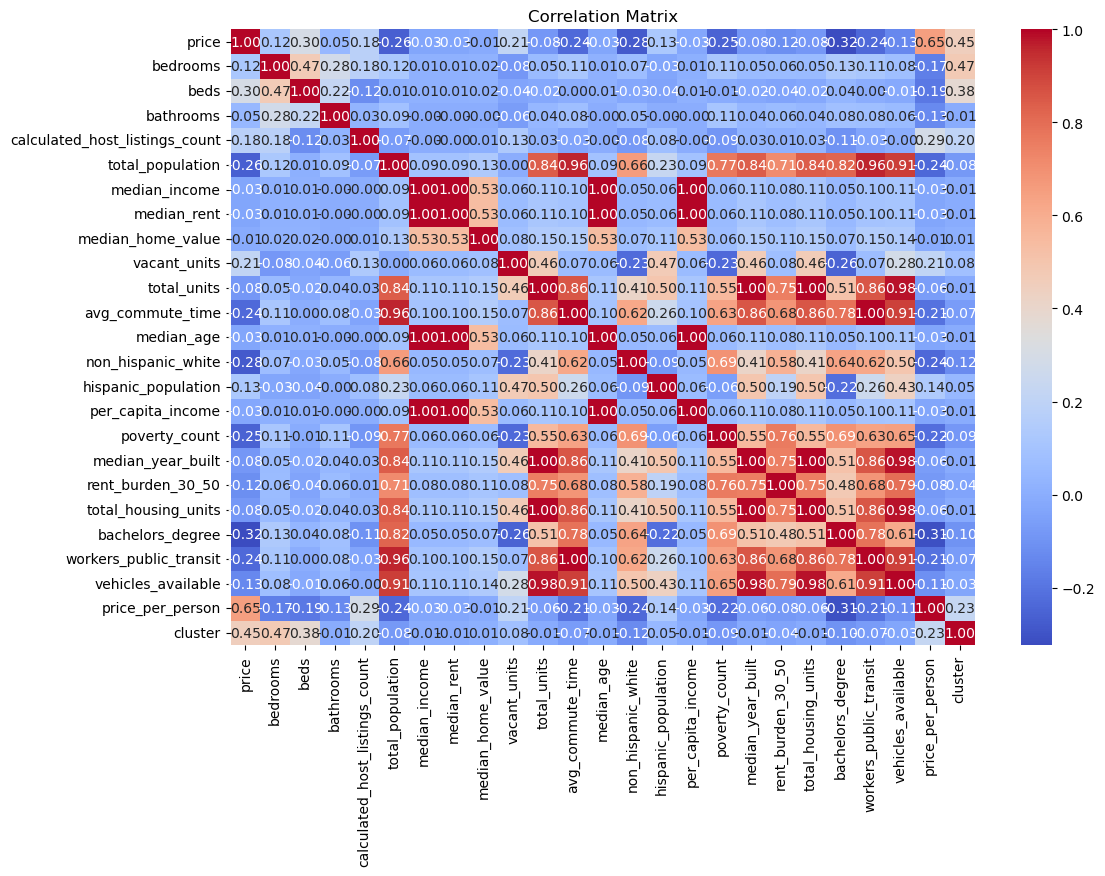

In [32]:
# remove non-numerical col
columns_to_drop = [
    'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type',
    'property_type', 'accommodates', 'zip_code', 'host_is_superhost',
    'neighbourhood_group_cleansed'
]

filtered_df = df.drop(columns=columns_to_drop)

numeric_df = filtered_df.select_dtypes(include=['number'])


correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

All of our census attributes seem to have a negative relationship with price!
- There are a few attributes with noticeable correlation (education, transit), we will look into those later

### 2.4.1 Income, Rent, and Demographics vs Price
Income, rent prices, and demographics of a zip code could very well determine the prices of AirBnB listings. Here, we consider:
- how are these attributes correlated? could they be reasonably clustered?
- do specific neighborhoods hold specific features? how can we categorize them?
- how does listing price relate to any of these demographics?

In [33]:
#we first look at the basic statistical data for these attributes
tmp_df = df[['neighbourhood_cleansed', 'median_income', 'per_capita_income', 'median_rent', 'median_age', 'hispanic_population', 'non_hispanic_white', 'poverty_count', 'price',]]
tmp_df.describe()

,median_income,per_capita_income,median_rent,median_age,hispanic_population,non_hispanic_white,poverty_count,price
count,2.089400e+04,2.089400e+04,2.089400e+04,2.089400e+04,20894.000000,20894.000000,20894.000000,20894.000000
mean,-1.022594e+06,-1.050702e+06,-1.114734e+06,-1.116711e+06,19210.005743,14769.801283,10146.040825,162.655691
std,2.726718e+07,2.726603e+07,2.726338e+07,2.726329e+07,13407.771561,12795.594369,7417.067185,107.860710
min,-6.666667e+08,-6.666667e+08,-6.666667e+08,-6.666667e+08,0.000000,0.000000,0.000000,8.000000
25%,6.480700e+04,3.558200e+04,1.550000e+03,3.420000e+01,8843.000000,6363.000000,4189.000000,80.000000
50%,8.476400e+04,4.458000e+04,1.936000e+03,3.630000e+01,17338.000000,9116.000000,8470.000000,135.000000
75%,1.139460e+05,9.824600e+04,2.434000e+03,4.000000e+01,27862.000000,19864.000000,14408.000000,215.000000
max,2.500010e+05,1.917090e+05,3.501000e+03,5.190000e+01,56909.000000,85529.000000,31579.000000,499.000000


In [34]:
#something looks wrong, mean of income and rent should not be negative. let's see why
df[df['total_population']==0].head()

,neighbourhood_cleansed,price,latitude,longitude,room_type,property_type,accommodates,bedrooms,beds,bathrooms,...,per_capita_income,poverty_count,median_year_built,rent_burden_30_50,total_housing_units,bachelors_degree,workers_public_transit,vehicles_available,price_per_person,cluster
490,Chelsea,50.0,40.751070,-73.998150,Entire home/apt,Entire rental unit,1,0.0,1.0,1.0,...,-666666666.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0
772,Hell's Kitchen,100.0,40.757480,-73.996870,Entire home/apt,Entire rental unit,2,0.0,1.0,1.0,...,-666666666.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0
773,Chelsea,55.0,40.751204,-73.995661,Entire home/apt,Entire rental unit,1,0.0,0.0,1.0,...,-666666666.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0
5907,Hell's Kitchen,211.0,40.755171,-73.996038,Entire home/apt,Entire rental unit,5,2.0,3.0,1.0,...,-666666666.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.2,3
8902,Chelsea,68.0,40.751110,-73.995211,Entire home/apt,Entire rental unit,1,0.0,1.0,1.0,...,-666666666.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,0


In [35]:
#there are 35 rows without census data, so let's remove them
df = df[df['total_population']!=0]

#now
tmp_df = df[['neighbourhood_cleansed','per_capita_income', 'median_rent', 'median_age', 'hispanic_population', 'non_hispanic_white', 'poverty_count', 'price']]
tmp_df.describe()

,per_capita_income,median_rent,median_age,hispanic_population,non_hispanic_white,poverty_count,price
count,20859.000000,20859.000000,20859.000000,20859.000000,20859.000000,20859.000000,20859.000000
mean,66156.895633,2017.215399,37.229407,19242.238842,14794.584016,10163.065200,162.522940
std,40551.854493,561.985841,4.218967,13395.884635,12792.001560,7411.623968,107.809897
min,17576.000000,925.000000,25.800000,246.000000,203.000000,141.000000,8.000000
25%,35582.000000,1550.000000,34.200000,8843.000000,6363.000000,4189.000000,80.000000
50%,44580.000000,1936.000000,36.300000,17338.000000,9116.000000,8470.000000,135.000000
75%,98246.000000,2434.000000,40.000000,27862.000000,19864.000000,14408.000000,214.000000
max,191709.000000,3501.000000,51.900000,56909.000000,85529.000000,31579.000000,499.000000


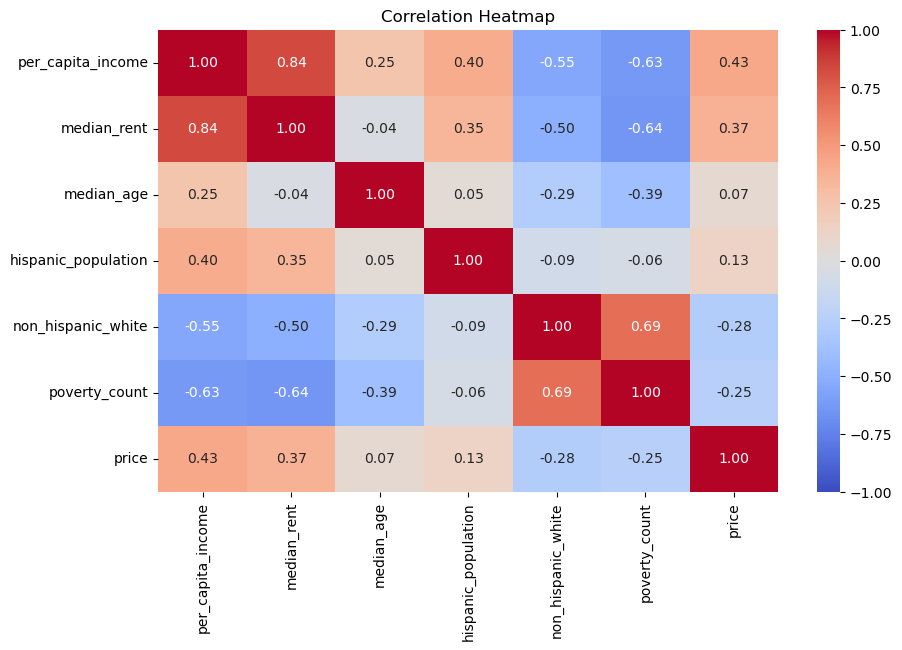

In [36]:
#now, let's look at the correlation of all these
corr = tmp_df[['per_capita_income', 'median_rent', 'median_age', 'hispanic_population', 'non_hispanic_white', 'poverty_count', 'price']].corr()

# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Correlations to note:
- Price and Hispanic population have a moderately positive correlation with median rent and per capita income
- There's a strongly positive correlation between per capita income and median rent
- There's a moderately negative correlation between per capita income, median rent, and median age with poverty count and non-Hispanic white people

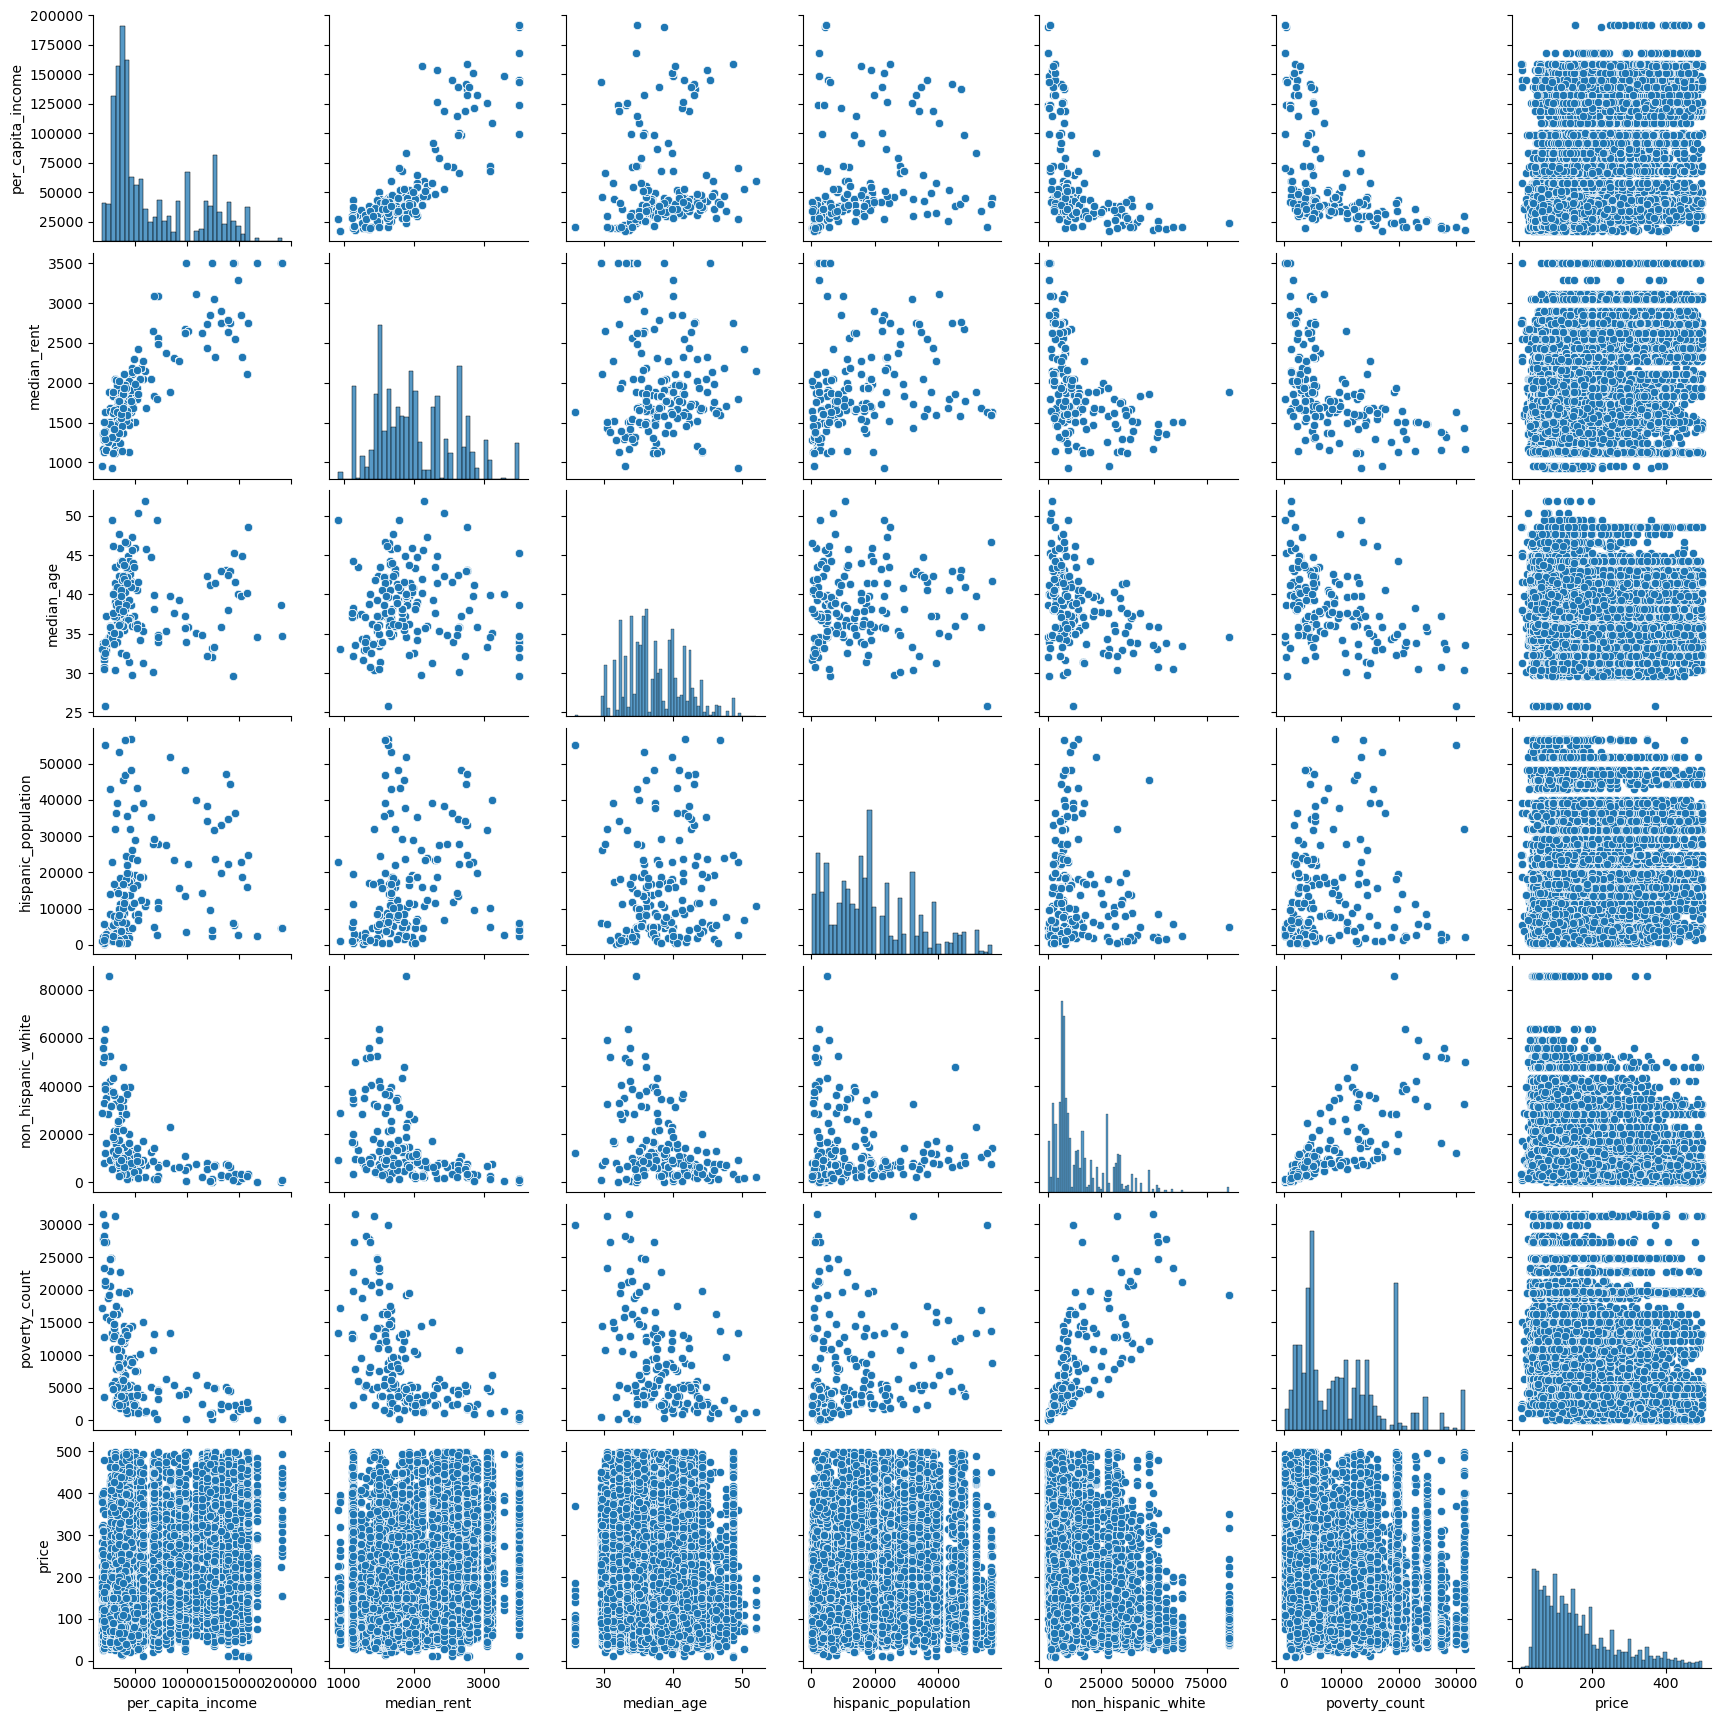

In [37]:
#let's take a closer look at the correlation using pair plots, there's a chance some of them might not be linear
sns.pairplot(tmp_df)
plt.show()

It looks like the correlation coefficients are right in some cases where the correlation is linear or without a clear correlation. However, there are some cases where correlation seems to be logarithmic, exponential, or reciprocal functions, which is good to keep in mind.

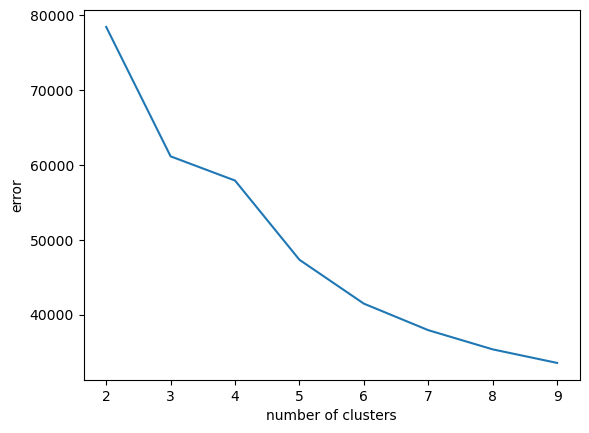

In [38]:
#now we see if we can cluster by group

#elbow method
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = tmp_df[['per_capita_income', 'median_rent', 'median_age', 'hispanic_population', 'poverty_count', 'non_hispanic_white']]
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

errors=[]
for n in range(2,10): 
    kmeans=KMeans(n) 
    kmeans.fit(scaled) 
    errors.append(kmeans.inertia_)

plt.plot(range(2,10),errors) 
plt.xlabel('number of clusters'); 
plt.ylabel('error');

/tmp/ipykernel_541/2671744454.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df.loc[:,'cluster'] = kmeans.fit_predict(scaled)


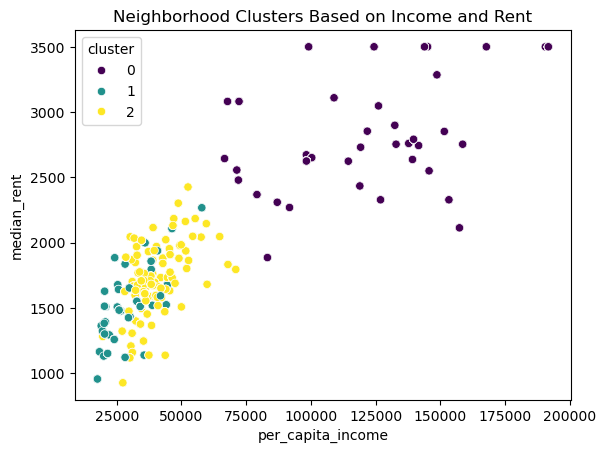

In [39]:
#fit K-means
kmeans = KMeans(n_clusters=3, random_state=42)
tmp_df.loc[:,'cluster'] = kmeans.fit_predict(scaled)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

#visualize clusters
sns.scatterplot(data=tmp_df, x='per_capita_income', y='median_rent', hue='cluster', palette='viridis')
plt.title('Neighborhood Clusters Based on Income and Rent')
plt.show()

There appears to be 3 clusters, one for zipcodes with high per capita income and high median rent (0), another for zipcodes with medium per capita income and low to medium rent (2), and another group with low per capita income and low to medium rent (1). Let's see which neighborhoods are in which cluster.

In [40]:
neighborhood_cluster = tmp_df.groupby('cluster')['neighbourhood_cleansed'].unique().reset_index()
pd.set_option('display.max_colwidth', None)
neighborhood_cluster

,cluster,neighbourhood_cleansed
0,0,"[South Slope, Sunnyside, Bedford-Stuyvesant, Kips Bay, Downtown Brooklyn, Murray Hill, Williamsburg, Upper East Side, Midtown, East Village, SoHo, Hell's Kitchen, Upper West Side, Carroll Gardens, Greenpoint, Chelsea, Long Island City, Park Slope, West Village, Little Italy, Roosevelt Island, Prospect Heights, Crown Heights, Clinton Hill, Windsor Terrace, Financial District, Nolita, Morningside Heights, Tribeca, Fort Greene, Vinegar Hill, Chinatown, Gramercy, Theater District, Ditmars Steinway, Flatiron District, Gowanus, Sunset Park, Stuyvesant Town, Battery Park City, Astoria, Brooklyn Heights, Red Hook, Greenwich Village, Boerum Hill, DUMBO, NoHo, Cobble Hill, Lower East Side, Columbia St, Two Bridges, East Harlem, Civic Center]"
1,1,"[Sunset Park, Brownsville, Bedford-Stuyvesant, Williamsburg, Harlem, Crown Heights, Bushwick, Ridgewood, Morningside Heights, Morris Heights, Washington Heights, Mount Hope, East New York, Highbridge, Longwood, Fort Greene, Cypress Hills, East Harlem, Kingsbridge, Concourse, Belmont, Far Rockaway, Corona, Elmhurst, Bay Ridge, Mott Haven, Borough Park, Morrisania, East Flatbush, Fieldston, Fordham, Clason Point, Williamsbridge, Tremont, Edgemere, Olinville, Spuyten Duyvil, Norwood, Van Nest, Jackson Heights, University Heights, Port Morris, Bensonhurst, Clinton Hill, Concourse Village, Claremont Village, Mount Eden, Forest Hills, Woodside, Flatbush, Midwood, Bayswater, Glendale, Unionport, Morris Park, Marble Hill, Dyker Heights, Parkchester, Melrose, Kensington, Greenpoint, Upper East Side, Allerton, West Farms, East Morrisania, Prospect Heights, Bronxdale, Woodhaven, Castle Hill, Boerum Hill, Soundview, Riverdale, Brooklyn Heights, Park Slope]"
2,2,"[Fort Hamilton, Morris Heights, East Harlem, Bedford-Stuyvesant, East Village, Bath Beach, Flatlands, Lower East Side, Mill Basin, Canarsie, Springfield Gardens, Gravesend, Washington Heights, Flatbush, Inwood, Flushing, Crown Heights, Maspeth, East Flatbush, Sheepshead Bay, Astoria, East Elmhurst, Rego Park, Sunnyside, Woodside, Bensonhurst, Harlem, Throgs Neck, Dongan Hills, Bayside, Allerton, Queens Village, Jamaica, Jamaica Estates, Baychester, Williamsbridge, Rockaway Beach, Schuylerville, Grant City, Forest Hills, Arverne, South Ozone Park, Bay Ridge, Kensington, Clifton, Chinatown, Oakwood, St. Albans, Cambria Heights, Wakefield, Ditmars Steinway, Richmond Hill, Chelsea, Staten Island, Willowbrook, Prospect-Lefferts Gardens, Rosedale, Sunset Park, Long Island City, Middle Village, Tompkinsville, West Brighton, Elmhurst, Woodhaven, Port Richmond, Ozone Park, Two Bridges, Gramercy, Midtown, Coney Island, College Point, Brighton Beach, Edenwald, Belle Harbor, Hunts Point, Bellerose, Laurelton, Gerritsen Beach, New Dorp Beach, New Springville, Morris Park, City Island, Mariners Harbor, Fresh Meadows, Co-op City, Briarwood, South Beach, Jamaica Hills, Pelham Gardens, Rosebank, Bull's Head, Jackson Heights, Arden Heights, North Riverdale, Windsor Terrace, Midwood, St. George, Dyker Heights, Financial District, Kew Gardens Hills, Kew Gardens, ...]"


- Now we can see the wealthier neighborhoods with higher rent (0) and not as wealthy with lower rents (1,2).
- Next, to see if rent and listing prices are related, we create a price to rent ratio.
    - If the ratio is over 1, it means that specific Airbnb listing is more expensive than the median renting price in that area.
    - If the ratio is between 0 and 1, then staying in that AirBnB would generally be cheaper than renting in that zipcode.

In [41]:
# price-to-rent
tmp_df.loc[:,'price_to_rent_ratio'] = tmp_df['price'] / (tmp_df['median_rent']/30.5)
tmp_df.head()

/tmp/ipykernel_541/4092471155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df.loc[:,'price_to_rent_ratio'] = tmp_df['price'] / (tmp_df['median_rent']/30.5)


,neighbourhood_cleansed,per_capita_income,median_rent,median_age,hispanic_population,non_hispanic_white,poverty_count,price,cluster,price_to_rent_ratio
0,Fort Hamilton,52048.0,1801.0,40.6,43362.0,14178.0,7636.0,89.0,2,1.507218
1,Sunset Park,25708.0,1641.0,36.0,13974.0,38012.0,20513.0,45.0,1,0.836380
2,Morris Heights,35363.0,1623.0,40.3,8924.0,31339.0,7806.0,107.0,2,2.010783
3,East Harlem,30083.0,1116.0,37.1,5033.0,16604.0,13268.0,140.0,2,3.826165
4,South Slope,98246.0,2673.0,37.2,48203.0,10855.0,4189.0,340.0,0,3.879536


In [42]:
# price-to-rent ratio
cluster_ratio = tmp_df.groupby('neighbourhood_cleansed')['price_to_rent_ratio'].mean()
cluster_ratio[cluster_ratio<1]

neighbourhood_cleansed
Little Neck    0.842333
Name: price_to_rent_ratio, dtype: float64

There is only one neighborhood with a price to rent ratio less than 1, meaning that in all other neighborhoods, living in an Airbnb is more expensive than renting. This makes sense because Airbnbs are typically for people traveling and not for people living in NYC longterm. In addition, this price difference could be because Airbnbs are furnished while apartments are not typically furnished.
- Now we see if different clusters have different price to rent ratios

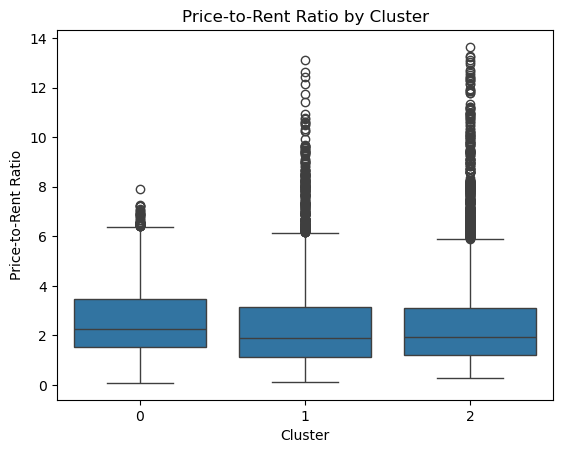

In [43]:
# Visualization
sns.boxplot(x='cluster', y='price_to_rent_ratio', data=tmp_df)
plt.title('Price-to-Rent Ratio by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Price-to-Rent Ratio')
plt.show()

While cluster 0 (the one with higher income and rent) has a slightly higher median price to rent ratio, the difference is not by a lot. This means airbnb prices typically follow rent trends, and actually increase more than rent in more wealthy areas when compared to less wealthy areas. 

#### 2.4.2 Commute and Education (Andrew)
- We will be taking a look at columns like workers public tranist, vehicels available, and commute times to determine if that has an effect on airbnb
  - Travel easier in the city perhaps?

In [44]:
pd.set_option('display.max_columns', None)

df.head(3)

,neighbourhood_cleansed,price,latitude,longitude,room_type,property_type,accommodates,bedrooms,beds,bathrooms,amenities,host_is_superhost,neighbourhood_group_cleansed,calculated_host_listings_count,zip_code,total_population,median_income,median_rent,median_home_value,vacant_units,total_units,avg_commute_time,median_age,non_hispanic_white,hispanic_population,per_capita_income,poverty_count,median_year_built,rent_burden_30_50,total_housing_units,bachelors_degree,workers_public_transit,vehicles_available,price_per_person,cluster
0,Fort Hamilton,89.0,40.61431,-74.03444,Private room,Private room in rental unit,1,1.0,1.0,1.0,"[Kitchen, Dedicated workspace, TV, Smoke alarm, Air conditioning, Wifi]",f,Brooklyn,1,11209,71812.0,88546.0,1801.0,935000.0,3168.0,33347.0,28537.0,40.6,14178.0,43362.0,52048.0,7636.0,33347.0,1605.0,33347.0,7960.0,28537.0,30179.0,89.0,0
1,Sunset Park,45.0,40.63952,-74.01484,Private room,Private room in rental unit,1,1.0,1.0,1.0,"[Single level home, Cleaning products, Stove, Smoke alarm, Window AC unit, Cooking basics, Exercise equipment, Refrigerator, Private living room, Long term stays allowed, Books and reading material, Ethernet connection, Kitchen, Hair dryer, Hot water, Free street parking, Iron, Portable heater, Fire extinguisher, Laundromat nearby, Microwave, Essentials, Private gym in building, Host greets you, Carbon monoxide alarm, Bed linens, Lock on bedroom door, Toaster, Radiant heating, Hangers, Dishes and silverware, Oven, Dedicated workspace, Extra pillows and blankets, First aid kit, Luggage dropoff allowed, HDTV with Roku, Clothing storage, Coffee maker, Wifi]",t,Brooklyn,2,11220,93008.0,62804.0,1641.0,978800.0,2658.0,30565.0,36683.0,36.0,38012.0,13974.0,25708.0,20513.0,30565.0,1677.0,30565.0,14065.0,36683.0,27907.0,45.0,0
2,Morris Heights,107.0,40.85003,-73.92281,Private room,Private room in rental unit,2,1.0,1.0,1.0,"[Kitchen, Hair dryer, Hot water, Dryer, Iron, Wifi, Heating, Private entrance, TV, Exterior security cameras on property, Essentials, Smoke alarm, Washer, Carbon monoxide alarm, Air conditioning, Hangers]",f,Bronx,3,10040,43653.0,59115.0,1623.0,454000.0,889.0,17430.0,17098.0,40.3,31339.0,8924.0,35363.0,7806.0,17430.0,824.0,17430.0,5462.0,17098.0,16541.0,53.5,0


In [45]:
# get all relevant columns related to these census data
tmp_df = df[['neighbourhood_cleansed','price','avg_commute_time', 'vehicles_available', 'workers_public_transit', 'bachelors_degree', 'total_population']]
tmp_df

,neighbourhood_cleansed,price,avg_commute_time,vehicles_available,workers_public_transit,bachelors_degree,total_population
0,Fort Hamilton,89.0,28537.0,30179.0,28537.0,7960.0,71812.0
1,Sunset Park,45.0,36683.0,27907.0,36683.0,14065.0,93008.0
2,Morris Heights,107.0,17098.0,16541.0,17098.0,5462.0,43653.0
3,East Harlem,140.0,12539.0,14833.0,12539.0,5340.0,38595.0
4,South Slope,340.0,29437.0,29465.0,29437.0,2872.0,72014.0
...,...,...,...,...,...,...,...
22644,Throgs Neck,110.0,18510.0,16168.0,18510.0,6938.0,46311.0
22645,Jamaica,65.0,9965.0,6136.0,9965.0,4057.0,21349.0
22646,East Elmhurst,367.0,12784.0,9736.0,12784.0,6950.0,32177.0
22647,East Elmhurst,89.0,12784.0,9736.0,12784.0,6950.0,32177.0


In [46]:
tmp_df.describe()

,price,avg_commute_time,vehicles_available,workers_public_transit,bachelors_degree,total_population
count,20859.000000,20859.000000,20859.000000,20859.000000,20859.000000,20859.000000
mean,162.522940,24354.449350,23947.286351,24354.449350,7388.818112,58344.998610
std,107.809897,10255.116674,9115.580603,10255.116674,5961.039782,25278.651107
min,8.000000,1919.000000,1990.000000,1919.000000,15.000000,3736.000000
25%,80.000000,16085.000000,16488.000000,16085.000000,2632.000000,38595.000000
50%,135.000000,24252.000000,26048.000000,24252.000000,5714.000000,58418.000000
75%,214.000000,29437.000000,32091.000000,29437.000000,10963.000000,78506.000000
max,499.000000,52779.000000,41653.000000,52779.000000,30944.000000,112750.000000


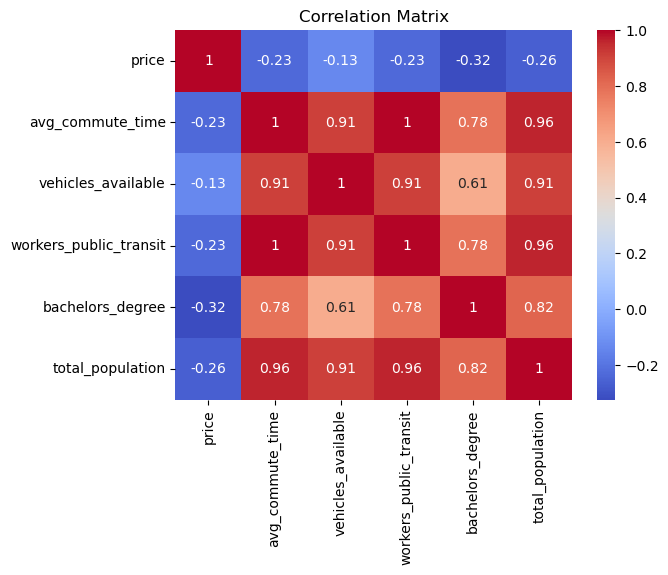

In [47]:
correlation_matrix = tmp_df[['price', 'avg_commute_time', 'vehicles_available', 'workers_public_transit', 'bachelors_degree', 'total_population']].corr()

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#### There seems to be a weak-moderate negative relationship between education/commutes to the price of the listings
- Price decreases with commute time or vehicle availability.
- Attributes like education and public transit might have secondary effects (e.g., on demand or neighborhood appeal).
- We should look into the relationship between these predictor variables and verify that there is an inverse relationship

#####
- With this much datapoints, we can try grouping the prices into 4 different quantiles and see if we get a better wholistic view based off that

/tmp/ipykernel_541/1998929499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['price_tier'] = pd.qcut(tmp_df['price'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])


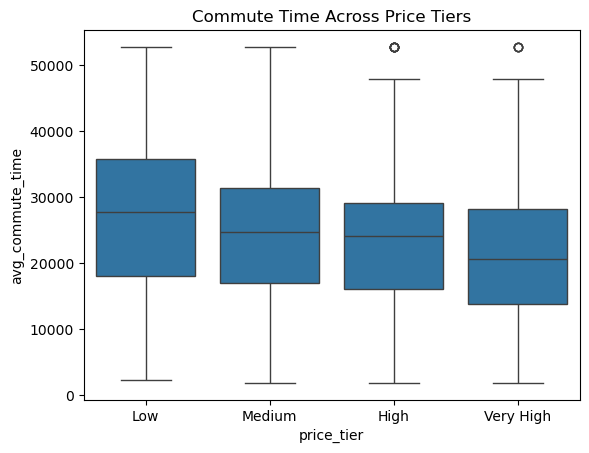

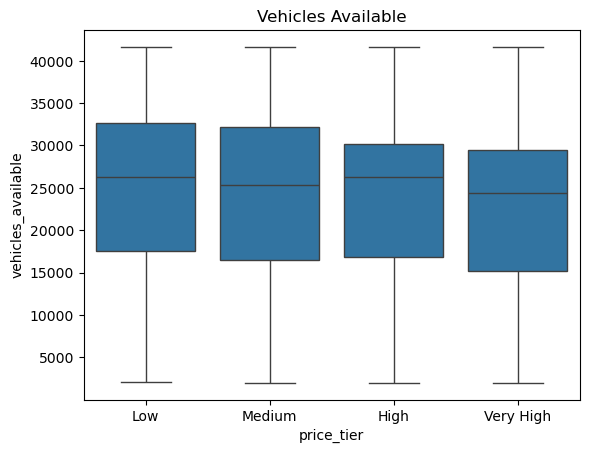

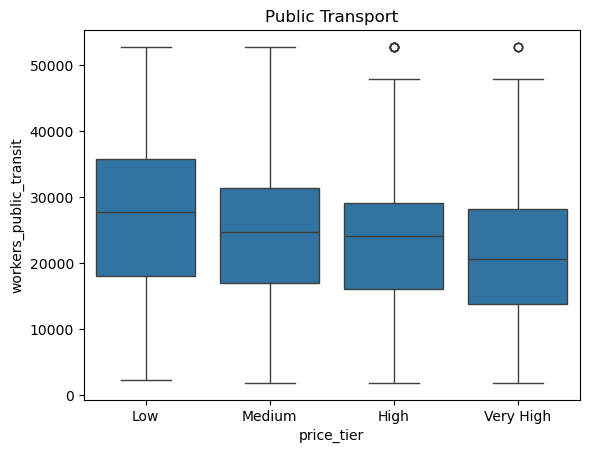

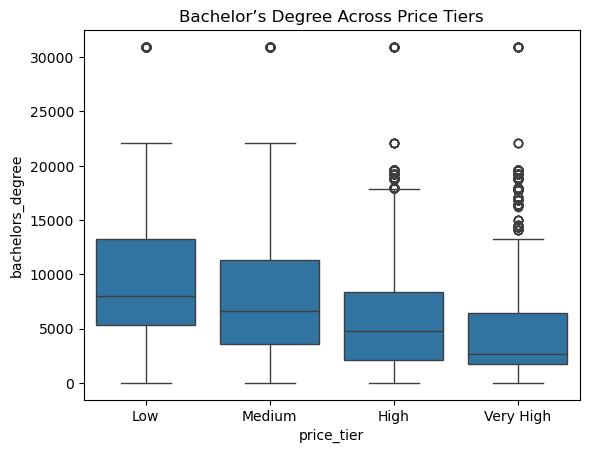

In [48]:
# we can get 4 quarters of price range
tmp_df['price_tier'] = pd.qcut(tmp_df['price'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])   

sns.boxplot(data=tmp_df, x='price_tier', y='avg_commute_time')
plt.title('Commute Time Across Price Tiers')
plt.show()

sns.boxplot(data=tmp_df, x='price_tier', y='vehicles_available')
plt.title('Vehicles Available')
plt.show()

sns.boxplot(data=tmp_df, x='price_tier', y='workers_public_transit')
plt.title('Public Transport')
plt.show()

sns.boxplot(data=tmp_df, x='price_tier', y='bachelors_degree')
plt.title('Bachelor’s Degree Across Price Tiers')
plt.show()


#### Suprising observation
- The higher the price range, the less commute times from work and less bachelor degree people live there
- Population density could play a significant role. 
  - High-price areas may have fewer people overall, or they could cater to more affluent individuals, influencing commute times and educational composition.
- And if there are fewer affluent individuals, it could also mean an older demographic who don't have the same background?

#### We will try to cluster to see if there any trends using clustering:
- time to work vs bachelor rates

In [49]:
clustering_features = tmp_df[['avg_commute_time', 'bachelors_degree', 'vehicles_available']]

# Standardize the data (important for clustering)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)


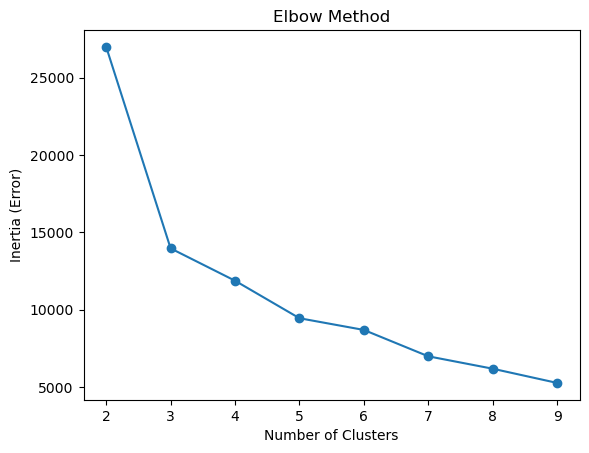

In [50]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method
errors = []
for n in range(2, 10):
    kmeans = KMeans(n, random_state=42)
    kmeans.fit(clustering_features_scaled)
    errors.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(2, 10), errors, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Error)')
plt.title('Elbow Method')
plt.show()


/tmp/ipykernel_541/3279347449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df['cluster_id'] = kmeans.fit_predict(clustering_features_scaled)


Cluster Centers (Unscaled): [[14041.94849624  3460.66165414 14044.35964912]
 [26800.44992594  6312.51099465 28300.48171357]
 [39182.6331058  17333.58556802 33897.88590931]]


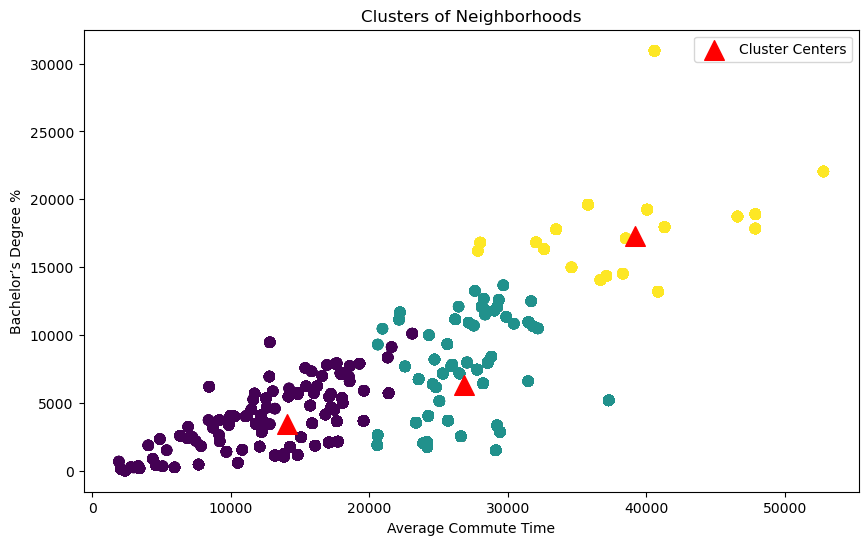

In [51]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
tmp_df['cluster_id'] = kmeans.fit_predict(clustering_features_scaled)

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers (Unscaled):", cluster_centers)

plt.figure(figsize=(10, 6))
plt.scatter(tmp_df['avg_commute_time'], tmp_df['bachelors_degree'], c=tmp_df['cluster_id'], cmap='viridis', s=50)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='^', s=200, c='red', label='Cluster Centers')
plt.xlabel('Average Commute Time')
plt.ylabel('Bachelor’s Degree %')
plt.title('Clusters of Neighborhoods')
plt.legend()
plt.show()

It looks like the clusters also form a linear relationship between these 2 variables, so a fair assumption:

- Higher-educated populations live further from central urban areas (commuting to high-paying jobs).
- Lower-educated populations are closer to workplaces or rely more on local jobs, reducing commute times.

### Exporting csv
- Let's export everything and see if there is anything fun to export

In [52]:
pd.DataFrame(df).to_csv('modeling', index=False)